In [1]:
# Importing necessary libraries for data processing and visualizing
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
#ignore annoying warning 
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
train_df = pd.read_csv('F:/ML/Kaggle/house prices/train.csv')
test_df  = pd.read_csv('F:/ML/Kaggle/house prices/test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train_df.shape

(1460, 81)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


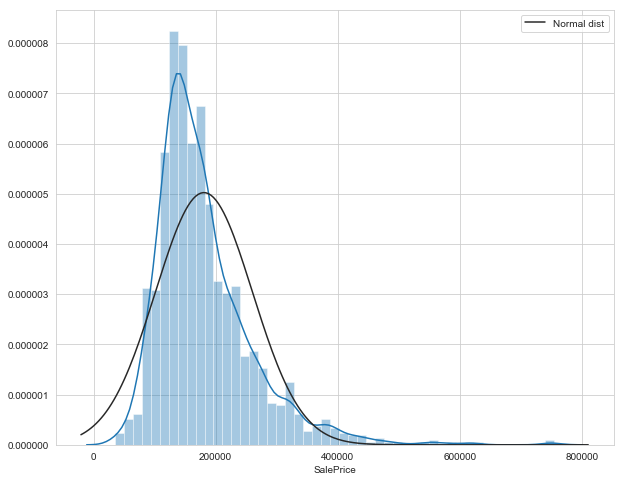

In [7]:
# Distribution of target variable
plt.subplots(figsize=(10,8))
sns.distplot(train_df['SalePrice'],fit = stats.norm)
plt.legend(['Normal dist'])


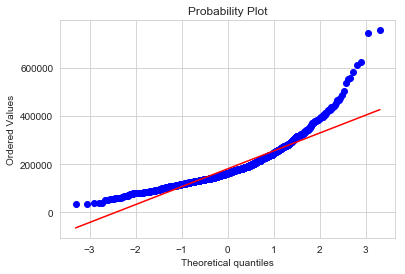

In [8]:
# Probability plot(measure of skewness of a variable )
stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

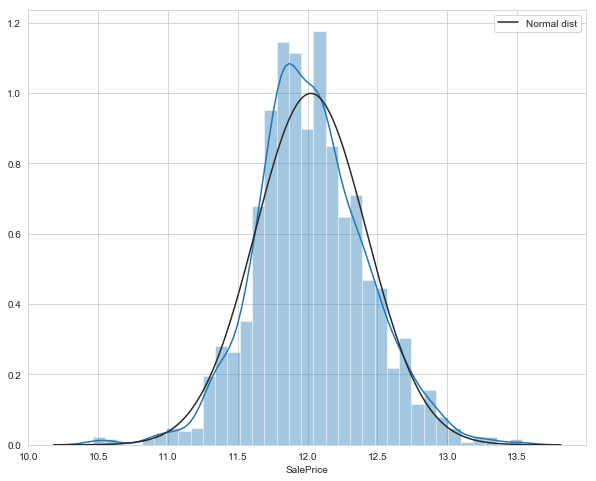

In [9]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
# Distribution of target variable
plt.subplots(figsize=(10,8))
sns.distplot(train_df['SalePrice'],fit = stats.norm)
plt.legend(['Normal dist'])


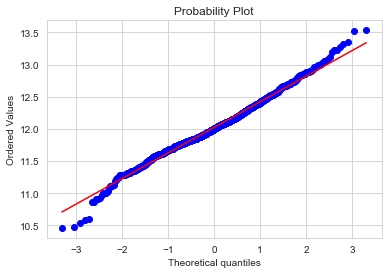

In [10]:
# Probability plot(measure of skewness of a variable )
stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

In [11]:
combine = pd.concat((train_df.drop(['SalePrice'],axis = 1),test_df))
combine.shape


(2919, 80)

In [12]:
#log transform skewed numeric features:
numeric_feats = combine.dtypes[combine.dtypes != "object"].index
#compute skewness
skewed_feats = train_df[numeric_feats].apply(lambda x: skew(x.dropna())) 
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

combine[skewed_feats] = np.log1p(combine[skewed_feats])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log1p
  


Missing value treatment

In [13]:
train = train_df.drop('Id', axis = 1)
test = test_df.drop('Id', axis = 1)

In [14]:
Isnull = combine.isnull().sum()
Isnull = Isnull[Isnull>0]
Isnull

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

1. Numerical Data

In [15]:
numeric_feats = combine.select_dtypes(include = [np.number])
numeric_feats.shape

(2919, 37)

In [16]:
Isnull = numeric_feats.isnull().sum()
Isnull = Isnull[Isnull>0]
Isnull

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

 LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood

In [17]:
combine["LotFrontage"] = combine.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

MasVnrArea has missing values most likely because of no Masonry Veneer

In [18]:
combine['MasVnrArea'] = combine['MasVnrArea'].fillna(0)

All basement related variables have missing values most likely due to no basement 

In [19]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    combine[col] = combine[col].fillna(0)


All basement related variables have missing values most likely due to no Garage

In [20]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    combine[col] = combine[col].fillna(0)


In [21]:
numeric_feats.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [22]:
# Now there are no missing values in numerical variables
ncombine = combine.select_dtypes(include = [np.number])
Isnull = ncombine.isnull().sum()
Isnull = Isnull[Isnull>0]
Isnull

Series([], dtype: int64)

2. Categorical Features

In [23]:
categoric_feats = combine.select_dtypes(exclude = [np.number])
categoric_feats.shape

(2919, 43)

In [24]:
Isnull = categoric_feats.isnull().sum()
Isnull = Isnull[Isnull>0]
Isnull

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [25]:
categoric_feats.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

MasVnrType has missing values most likely because of no Masonry Veneer

In [26]:
combine['MasVnrType'] = combine['MasVnrType'].fillna(0)

both Exteriors

In [27]:
combine['Exterior1st'] = combine['Exterior1st'].fillna(combine['Exterior1st'].mode()[0])
combine['Exterior2nd'] = combine['Exterior2nd'].fillna(combine['Exterior2nd'].mode()[0])


Alley

In [28]:
combine['Alley'] = combine['Alley'].fillna(combine['Alley'].mode()[0])

MSZoning

In [29]:
combine['MSZoning'] = combine['MSZoning'].fillna(combine['MSZoning'].mode()[0])

Utilities

In [30]:
combine['Utilities'] = combine['Utilities'].fillna(combine['Utilities'].mode()[0])

All basement related categorical  variable have missing values most likely because of no basement 

In [31]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    combine[col] = combine[col].fillna('None')

All Garage related categorical  variable have missing values most likely because of no Garage 

In [32]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond'):
    combine[col] = combine[col].fillna(0)

Electrical 

In [33]:
combine['Electrical'] = combine['Electrical'].fillna(combine['Electrical'].mode()[0])

KitchenQual

In [34]:
combine['KitchenQual'] = combine['KitchenQual'].fillna(combine['KitchenQual'].mode()[0])

Functional

In [35]:
combine['Functional'] = combine['Functional'].fillna(combine['Functional'].mode()[0])

FireplaceQu

In [36]:
combine['FireplaceQu'] = combine['FireplaceQu'].fillna('None')

PoolQC

In [37]:
combine['PoolQC'] = combine['PoolQC'].fillna('None')

Fence

In [38]:
combine['Fence'] = combine['Fence'].fillna('None')

MiscFeature

In [39]:
combine['MiscFeature'] = combine['MiscFeature'].fillna('None')

SaleType

In [40]:
combine['SaleType'] = combine['SaleType'].fillna(combine['SaleType'].mode()[0])

In [65]:
Isnull = combine.isnull().sum()

Isnull

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
                        ..
PavedDrive_Y             0
PoolQC_Ex                0
PoolQC_Fa                0
PoolQC_Gd                0
PoolQC_None              0
Fence_GdPrv              0
F

In [42]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

# Getting dummies for  categorical features

In [43]:
combine = pd.get_dummies(combine)
combine.shape

(2919, 303)

In [44]:
# New train and test set
X_train = combine[:train.shape[0]]
X_test = combine[train.shape[0]:]
y_train = train['SalePrice']

# Building Machine Learning Models

In [45]:
# Importing necessary libraries for Algorithms
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,ElasticNet,Ridge, LassoCV, Lasso
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

Defining a function that returns the cross-validation error so we can evaluate our models and pick the best model 

In [46]:
n_folds = 5

def rmsle_cv(model):
    
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Base Models

1. Ridge Regression

Text(0, 0.5, 'rmsle')

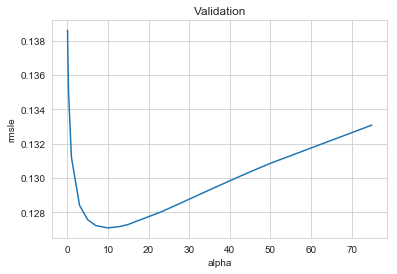

In [47]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 7,10,13, 15,23,27,30,35,40,45,50, 75]

cv_ridge = [rmsle_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmsle")

In [48]:
model_ridge.fit(X_train,y_train)
ridge_preds = np.expm1(model_ridge.predict(X_test))
cv_ridge.min()

0.12709684269863325

2. Lasso Regression

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [49]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005))
lasso.fit(X_train,y_train)
lasso_preds = np.expm1(lasso.predict(X_test))
rmsle_cv(lasso).mean()

0.12258463076585653

In [50]:
rmsle_cv(lasso).std()

0.01604898712115006

In [51]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
model_lasso.fit(X_train,y_train)
lassoCV_preds= np.expm1(model_lasso.predict(X_test))
rmsle_cv(model_lasso).mean()

0.12304851068265829

In [52]:
rmsle_cv(model_lasso).std()

0.015786302246634135

3. Elastic Net Regression

In [53]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005))
ENet.fit(X_train,y_train)
ENet_preds = np.expm1(ENet.predict(X_test))
rmsle_cv(ENet).mean()

0.12379666037180312

In [54]:
rmsle_cv(ENet).std()

0.016283926669959262

4. Gradient Boosting Regressor

In [55]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train,y_train)
GBoost_preds = np.expm1(GBoost.predict(X_test))
rmsle_cv(GBoost).mean()

0.12478324297162272

In [56]:
rmsle_cv(GBoost).std()

0.011497820006916534

5. Random Forest

In [57]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_preds = np.expm1(random_forest.predict(X_test))
rmsle_cv(random_forest).mean()

0.14280672613781886

In [58]:
random_forest_preds

array([126637.15930405, 155880.50485374, 174042.6536149 , ...,
       153193.99061339, 108822.43789337, 236983.87014807])

In [59]:
rmsle_cv(random_forest).std()

0.009893481604662491

# Averaged Model 

In [60]:
preds  = ridge_preds*0.2 + lasso_preds*0.2 + lassoCV_preds*0.2 + GBoost_preds*0.3 + random_forest_preds*0.1

In [63]:
sub = pd.DataFrame()
sub['Id'] = test_df['Id']
sub['SalePrice'] = preds
sub.to_csv(r'F:/ML/Kaggle/house prices/submission.csv',index=False)